#Analisi della retinopatia diabetica

##0 - Breve introduzione sulla retinopatia diabetica
*fonte: [humanitas.it](https://www.humanitas.it/malattie/retinopatia-diabetica/)*

La **retinopatia diabetica** è una complicazione del diabate che colpisce gli occhi. È causata da un danno ai vasi sanguigni del tessuto della parte fotosensibile dell'occhio, la retina. Può svilupparsi in tutti coloro che soffrono di diabate di tipo 1 e di tipo 2. Nei pazienti che hanno il diabete da molti anni e nei casi in cui lo zucchero nel sangue è stato controllato a lungo male è più probabile il rischio di retinopatia.

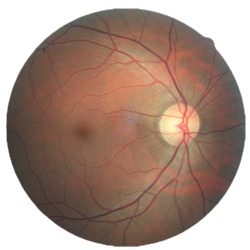

Esistono due tipi di retinopatia diabetica.

La **retinopatia diabetica precoce**, anche nota come retinopatia diabetica non proliferante (NPDR), che può essere lieve, moderata o severa. Con l'avanzare della malattia, le pareti dei vasi sanguigni si indeboliscono e vanno soggetti ai microaneurismi, piccoli rigonfiamenti che danneggiandosi danno vita a sanguinamenti. C'è il rischio poi che si formi un accumulo di liquidi (edema) nella parte centrale della cornea (macula) che causa la riduzione della vista.

La **retinopatia diabetica proliferante** (PDR) o avanzata è il tipo più grave perché coincide con la crescita anormale di nuovi vasi sanguigni a danno della retina. Ciò può provare un distacco della retina oppure un flusso anormale dei liquidi nell'occhio che causano il glaucoma.


La **causa della retinopatia diabetica** principale è il diabete, ancor pià se controllato male, si associa ad un'anomala crescita dei vasi sanguigni deboli, più soggetti a rottura o più piccoli che comporta una minore capacità di trasporto di ossigeno ai tessuti retinici. Generalmente la retinopatia colpisce entrambi gli occhi.

I **sintomi della retinopatia diabetica** sono macchie o fili scuri che galleggiano davanti agli occhi, vista offuscata, ipovisione, difficoltà della percezione dei colori, cecità.

Le metodiche per la **diagnosi iniziale della retinopatia diabetica** sono:

*   Foto a colori del fondo, eseguita con il retinografo;
*   Fluorangiografia retininica, se vi sono segni di retinopatia diabetica proliferante per definire la presenza di aree ischemiche.
*   Tomografia assiale computerizzata (OCT), che permette di studiare in dettaglio la macula e il nervo ottico.



La retinopatia è una malattia "silenziosa", che può svilupparsi a lungo senza sintomi, fin quando non interessa la macula. Una gestione adeguata della retinopatia diabetica può ridurre del 90% il rischio a 5 anni di sviluppare cecità nei pazienti con retinopatia proliferante. Tuttavia, secondo le statistiche, solo 1 paziente diabetico su 2 si sottopone a controlli regolari che permettono di scongiurare l'avanzare della patologia e il rischio di perdere la vista.

##1 - Diabetic Retinopathy Detection

###1.1 - Importazione delle librerie

Importiamo diverse librerie essenziali per lavorare con dati, modelli di machine learning e immagini, tra cui: `matplotlib.pyplot` per la visualizzazione dei dati e delle immagini, `TensorFlow` per la creazione e l'addestramento di modelli di Deep Learning, `NumPy` per operazioni matematiche avanzate su array, pickle per il salvataggio e il caricamento di oggetti Python, `copy` per la copia profonda di oggetti, `math` per funzioni matematiche comuni, `ddown` per il download di file da Google Drive, e `cv2` (OpenCV, libreria per l'elaborazione delle immagini).

In [ ]:
#!pip install tensorflow-gpu==2.8.3
!pip install tensorflow
!pip install opencv-python
!pip install gdown
!pip install pandas
!pip install keras-vis

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import imutils
import random
import pickle
import gdown
import copy
import math
import cv2
import os
import shutil

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.models import load_model
import seaborn as sns

###1.2 - Caricamento dei dati

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Percorso della nuova cartella su Google Drive
folder_path = '/content/drive/My Drive/ModelH5'

# Crea la cartella se non esiste
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [ ]:
#Andiamo a prendere ID del file di Google Drive
file_id = '1hEjzNwTg0F03GiwrcrF_bRTSpebOWT1r'
#URL per il download
url = f'https://drive.google.com/uc?id={file_id}'
#Impostiamo il nome del file da salvare
output = 'dataset.zip'
#Scarica il file
gdown.download(url, output, quiet=False)
print(f"\nDataset scaricato e salvato come {output}!")

Downloading...
From (original): https://drive.google.com/uc?id=1hEjzNwTg0F03GiwrcrF_bRTSpebOWT1r
From (redirected): https://drive.google.com/uc?id=1hEjzNwTg0F03GiwrcrF_bRTSpebOWT1r&confirm=t&uuid=b157d44e-e650-4ec5-82e0-fad6cf449eb5
To: /content/dataset.zip
100%|██████████| 448M/448M [00:19<00:00, 23.1MB/s]


Dataset scaricato e salvato come dataset.zip!


In [ ]:
#Unzip del dataset
!unzip dataset.zip

Archive:  dataset.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0684311afdfc.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/06b71823f9cd.png  
  inflating: gaussian

In [ ]:
!ls

dataset.zip  drive  gaussian_filtered_images  sample_data  train.csv


In [ ]:
df = pd.read_csv(r'/content/train.csv')
diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}
diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}
df['binary_type'] =  df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head()

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


In [ ]:
df['binary_type'].value_counts()

binary_type
DR       1857
No_DR    1805
Name: count, dtype: int64

<Axes: ylabel='binary_type'>

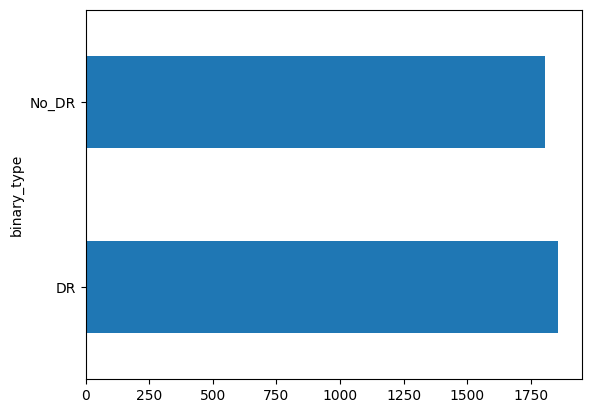

In [ ]:
df['binary_type'].value_counts().plot(kind='barh')

In [ ]:
df['type'].value_counts()

type
No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64

<Axes: ylabel='type'>

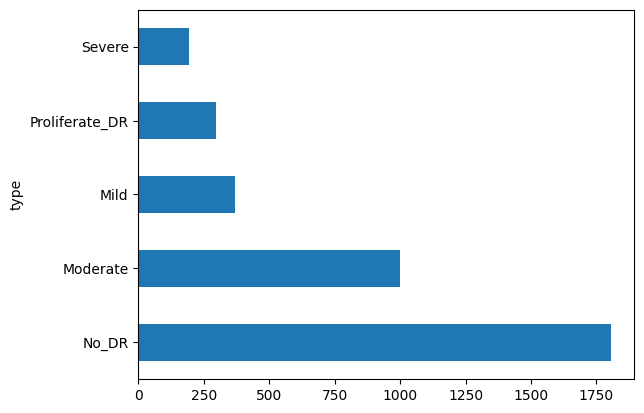

In [ ]:
df['type'].value_counts().plot(kind='barh')

Andiamo a creare le cartelle che ci serviranno per preparare i dataset.

In [ ]:
# Percorso della cartella principale
root_path = '/content/gaussian_filtered_images/gaussian_filtered_images'

# Cartelle di destinazione
dest_folders = {'train': 0.7, 'val': 0.15, 'test': 0.15}

# Crea le cartelle train, val e test
for folder in dest_folders:
    folder_path = os.path.join(root_path, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        # Crea le sottocartelle per ogni categoria di DR
        for category in ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']:
            os.makedirs(os.path.join(folder_path, category))

# Funzione per suddividere i dati e copiarli nelle nuove cartelle
def split_and_copy_files(category_path, category):
    files = os.listdir(category_path)
    train_files, test_files = train_test_split(files, test_size=dest_folders['val'] + dest_folders['test'], random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=dest_folders['test'] / (dest_folders['val'] + dest_folders['test']), random_state=42)

    # Funzione per copiare i file
    def copy_files(files, folder_name):
        for file in files:
            src_file_path = os.path.join(category_path, file)
            dest_file_path = os.path.join(root_path, folder_name, category, file)
            shutil.copy(src_file_path, dest_file_path)

    # Copia i file nei rispettivi set
    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

# Leggi ogni categoria e applica la suddivisione e la copia
for category in ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']:
    category_path = os.path.join(root_path, category)
    split_and_copy_files(category_path, category)

print("Files are successfully split into train, val, and test folders.")

Files are successfully split into train, val, and test folders.


Tramite la funzione `tf.keras.utils.image_dataset_from_directory` di TensorFlow creiamo dei dataset di immagini da directory specifiche.
Nello specifico:
* Da come si può intuire, `gaussian_dataset/...` è il percorso della directory da dove andremo a prendere le immagini;
* `image_size=(224, 224)` specifica che ogni immagine sarà ridimensionata a 224x224 pixel. Questa è la dimensione per le immagini di input per il modello VGG;
* `bach_size=32` indica che le immagini saranno raggrupate in batch di 32. I batch sono usati durante l'allenamento del modello per aggiornaere i pesi della rete, permettendo di gestire efficiemente grandi quantità di dati.

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory("/content/gaussian_filtered_images/gaussian_filtered_images/train",image_size=(224, 224),batch_size=32)
validation_dataset = tf.keras.utils.image_dataset_from_directory("/content/gaussian_filtered_images/gaussian_filtered_images/val",image_size=(224, 224),batch_size=32)
test_dataset = tf.keras.utils.image_dataset_from_directory("/content/gaussian_filtered_images/gaussian_filtered_images/test",image_size=(224, 224),batch_size=32)

Found 2562 files belonging to 5 classes.
Found 549 files belonging to 5 classes.
Found 551 files belonging to 5 classes.


##2 - Modello VGG16

###2.1 - Implementazione del modello

Istanziamo il modello VGG16, un modello pre-addestrato di rete neurale convoluzionale (CNN) reso disponibile dalla libreria TensorFlow Keras. Il modello VGG16 è ampiamente utilizzato in applicazioni di visione artificiale per il riconoscimento di immagini. Specificamente, ogni parte si occupa di:
* Creazione dell'istanza di VGG16 tramite `conv_baseVGG16 = tf.keras.applications.vgg16.VGG16()`;
* Andiamo ad impostare i parametri del modello VGG16: `weights='imagenet'` specifica i pesi pre-addestrati sul dataset ImageNet. Caricare i modelli pre-addestrati permette di sfruttare la conoscenza (le features apprese) dal modello già addestrato su un vasto set di immagini e classi. `include_top=False` indica di non includere i livelli densamente connessi nella parte superiore della rete. Questo è comune quando si usa VGG16 come base convoluzionale in applicazioni di transfer learning, dove si desidera afattare il modello a classi specifiche non coperte da Imagenet.
* `input_shape=(224, 224, 3)` definisce la forma dell'input che il modello si aspetta. In questo caso, il modello si aspetta immagini di dimensione 224x224 pixel con 3 canali di colore (RGB).  

In [ ]:
# Istanziamo il modello VGG16
conv_baseVGG16 = tf.keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False, # include_top si riferisce all'inclusione (o meno) dei livelli densamente connessi di classificazione
 input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 4s 0us/step


Il metodo `summary()` in TensorFlow è utilizzato per stampare un riepilogo del modello, che include dettagli su tutti i layer nel modello, le forme degli output di ciascun layer e il numero di parametri (pesi e bias) che ciascun layer contiene. Quindi, quando eseguiamo `conv_baseVGG16.summary()` chiediamo una panoramica dettagliata dell'architettura del modello che abbiamo utilizzato.

In [ ]:
conv_baseVGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

La funzione inizialmente conserva una copia delle immagini originali nel dataset. Questo è utile per applicazioni come la visualizzazione degli input originali a fianco dei risultati delle predizioni o per eventuali analisi successive.

Tramite una rete convolutiva base pre-addestrata `preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)` andiamo ad applicare il preprocessing specifico per il modello VGG16. La funzione `preprocess_input()` di VGG16 adatta le immagini secondo le necessità del modello, ad esempio scalando i pixel in un range appropriato e applicando specifiche modifiche al colore che sono richieste per il modello VGG16.

Dopo il preprocessing, le immagini vengono passate attraverse una rete VGG16 pre-addestrata `conv_baseVGG16` per estrarre le features.

Al termine dell'iterazione su tutto il dataset, le features estratte, le etichette e le immagini originali sono combinate utilizzando `np.concatenate`. Questo passo aggrega i dati che sono stati elaborati in batch separati durante l'iterazione sul dataset.

In [ ]:
def get_features_labels_image(dataset):
    all_features = []
    all_labels = []
    all_original_images = []

    for images, labels in dataset:
        # Conserva le immagini originali
        all_original_images.append(images.numpy())

        # Preprocessamento per VGG16
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)

        # Estrazione delle features con VGG16
        features = conv_baseVGG16.predict(preprocessed_images)

        all_features.append(features)
        all_labels.append(labels)

    # Combiniamo i batch di dati
    return (np.concatenate(all_features), np.concatenate(all_labels), np.concatenate(all_original_images))

Impieghiamo la funzione sopra definita per l'estrazione delle caratteristiche.

In [ ]:
train_features, train_labels, train_image = get_features_labels_image(train_dataset)
val_features, val_labels, val_image = get_features_labels_image(validation_dataset)
test_features, test_labels, test_image = get_features_labels_image(test_dataset)

1/1 [==============================] - 1s 1s/step


Andiamo a definire una pila di livelli densamente connessi che specializzeremo nella classificazione multiclasse dei vettori di caratteristiche estratti:
* `inputs = tf.keras.Input(shape=(7, 7, 512))` definisce il layer di input che aspetta tensori con la forma `(7, 7, 512)`.
* `x = tf.keras.layers.Flatten()(inputs)` questo layer trasforma il tensore 3D di input in un vettore 1D. Questo passaggio è necessario perché i layer densi (Dense) successivi richiedono un input unidimensionale.
* `x = tf.keras.layers.Dense(256, activation='relu')(x)` abbiamo un layer Dense con 256 unità e attivazione ReLU. Il layer Dense è un layer densamente connesso che impara le features dall'input appiattito.
* `x = tf.keras.layers.Dropout(0.5)(x)` implemenatiamo un layer di Dropout con tasso di 0.5, il che significa che metà delle unità del layer precedenete vengono disattivate casualmente durante l'allenamento. Questo è un metodo comune per prevenire l'overfitting.
* `outputs = tf.keras.layers.Dense(5, activation='softmax')(x)` definiamo un layer con 5 unità e l'attivazione sotfmax. Il modello è quindi adattato per la classificazione multiclasse, dove ciascuna delle 5 unità corrisponde ad una classe.
* `modelVGG16 = tf.keras.Model(inputs=inputs, outputs=outputs)` creiamo effettivamente il modello, specificando gli input e gli output. Con questo il modello è pronto per essere compilato e allenato su un set di dati.

In [ ]:
inputs = tf.keras.Input(shape=(7, 7, 512))

# Appiattimento del tensore di input per renderlo adatto al livello Dense
x = tf.keras.layers.Flatten()(inputs)
# Primo livello Dense con 256 unità e attivazione ReLU
x = tf.keras.layers.Dense(256, activation='relu')(x)
# Livello di Dropout per ridurre l'overfitting disattivando casualmente alcune unità
x = tf.keras.layers.Dropout(0.5)(x)
# Livello Dense di output per la classificazione multiclasse con attivazione softmax
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

modelVGG16 = tf.keras.Model(inputs=inputs, outputs=outputs)

Compiliamo il modello:
* `modelVGG16.compile()` con questo comando andiamo a preparare il modello per l'allenamento. Specifichiamo anche le funzioni di perdita, l'ottimizzatore e le metriche da usare.
* `loss='sparse_categorical_crossentropy` è una scelta che riguarda la classificazione multiclasse quando le etichette delle classi sono fornite come interi.
* `optimizer='rmsprop'` è un ottimizzatore che utilizza il metodo della discesa del gradiente per aggiornare i parametri del modello in modo da minimizzare la funzione di perdita.
* `metrics=['accuracy']` il modello tiene traccia dell'accuratezza durante l'allenamento e la validazione.

In [ ]:
modelVGG16.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Definiamo dei callbacks; con il metodo `tf.keras.callbacks.ModelCheckpoint()` impostiamo un checkpoint per salvare i modello allenato. Questo callback salva il modello ad ogni epoca solo se c'è un miglioramento nel `val_loss` (la perdita sul dataset di validazione), permettendo di mantenere la versione del modello che ha performato meglio sulla validazione.

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath="feature_extraction.keras", save_best_only=True, monitor="val_loss")]

Con il metodo `fit()` effettuiamo il processo di allenamento del modello. Le `train_features, train_labels` sono i dati di allenamento e le etichette corrispondenti. `epochs=15` indica che l'intero dataset di allenamento sarà passato attraverso il modello 15 volte. `validation_data=(val_features, val_labels)` fornisce i dati di validazione che il modello userà per testare la sua performance dopo ogni epoca. `callbacks=callbacks` applica il callbacks definito in precedenza.

In [ ]:
history = modelVGG16.fit(train_features, train_labels, epochs=15, validation_data=(val_features, val_labels), callbacks=callbacks)

Epoch 1/15
81/81 [==============================] - 0s 6ms/step - loss: 0.6641 - accuracy: 0.7436 - val_loss: 1.3083 - val_accuracy: 0.7395
Epoch 2/15
81/81 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.7440 - val_loss: 1.2850 - val_accuracy: 0.7377
Epoch 3/15
81/81 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.7369 - val_loss: 1.1511 - val_accuracy: 0.7486
Epoch 4/15
81/81 [==============================] - 0s 5ms/step - loss: 0.6614 - accuracy: 0.7432 - val_loss: 1.8461 - val_accuracy: 0.7359
Epoch 5/15
81/81 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.7463 - val_loss: 1.3648 - val_accuracy: 0.7341
Epoch 6/15
81/81 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.7420 - val_loss: 1.4412 - val_accuracy: 0.7359
Epoch 7/15
81/81 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.7475 - val_loss: 1.8294 - val_accuracy: 0.7395
Epoch 8/15
81/81 [==

###2.2 - Valutazione del modello

Andiamo a plottare i grafici per addestramento e validazione.

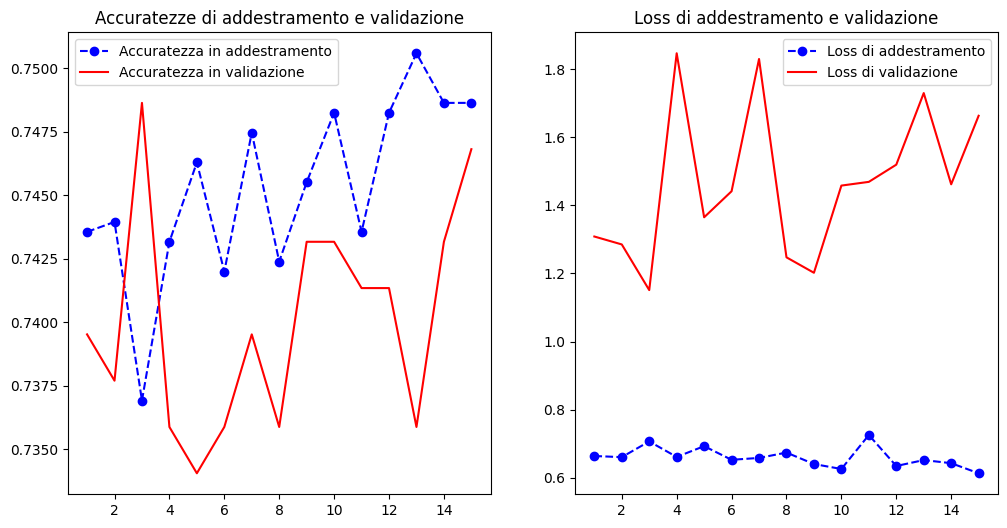

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Crea una figura con una griglia di 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # figsize controlla la dimensione totale della figura

# Grafico delle accuratezze
ax1.plot(epochs, acc, marker='o', linestyle='--', color='b', label="Accuratezza in addestramento")
ax1.plot(epochs, val_acc, "r", label="Accuratezza in validazione")
ax1.set_title("Accuratezze di addestramento e validazione")
ax1.legend()

# Grafico delle loss
ax2.plot(epochs, loss, marker='o', linestyle='--', color='b', label="Loss di addestramento")
ax2.plot(epochs, val_loss, "r", label="Loss di validazione")
ax2.set_title("Loss di addestramento e validazione")
ax2.legend()

# Mostra i grafici
plt.show()

Abbiamo raggiunto un'accuratezza del 72% circa:
* L'accuratezza in addestramento mostra una tendenza generale all'aumento, il che è positivo perché indica che il modello sta imparando dai dati di addestramento. La discrepanza tra l'accuratezza in addestramento e quella in validazione suggerisce che il modello potrebbe non generalizzare bene su dati nuovi o diversi da quelli di addestramento. Tuttavia, l'accuratezza in validazione fluttua notevolmente e la discrepanza tra l'accuratezza e la validazione, suggeriscono un overfitting o una possibile instabilità del modello.
* La loss di addestramento diminuisce constantemente, il che è buono perché indica che il modello sta riducendo l'errore sul set di addestramento. La loss di validazione, dopo un iniziale picco molto alto, si stabilizza rapidamente a livelli bassi. Dopo il picco iniziale, le curve di loss sembrano stabilizzarsi, il che potrebbe indicare che il modello ha trovato una configurazione di pesi relativamente stabile che minimizza l'errore.

Andiamo a valutare il modello sul dataset di test.

In [ ]:
test_model = tf.keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

18/18 [==============================] - 0s 3ms/step - loss: 0.8259 - accuracy: 0.7169
Test accuracy: 0.717


Tramite la funzione `get_labels_and_predictions()` andiamo ad estrarre le etichette e le predizioni per il dataset di test.

In [ ]:
# Funzione per estrarre etichette e predizioni dal dataset
def get_labels_and_predictions(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds)
    return np.array(y_true), np.array(y_pred)

Utilizziamo la funzione `calculate_tpr_fpr()` per calcolare il TPR e il FPR per ciascuna classe.

In [ ]:
# Funzione per calcolare TPR e FPR per ciascuna classe
def calculate_tpr_fpr(y_true, y_pred, num_classes=5):
    cm = confusion_matrix(y_true, y_pred)
    tpr = {}
    fpr = {}

    for i in range(num_classes):
        tp = cm[i, i]
        fn = np.sum(cm[i, :]) - tp
        fp = np.sum(cm[:, i]) - tp
        tn = np.sum(cm) - (tp + fp + fn)

        tpr[i] = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr[i] = fp / (fp + tn) if (fp + tn) != 0 else 0

    return tpr, fpr

Andiamo a richiamare le funzioni appena viste.

In [ ]:
# Ottenere etichette e predizioni dal test_dataset
#test_y_true, test_y_pred = get_labels_and_predictions(modelVGG16, test_dataset)

# Calcolare TPR e FPR
#tpr, fpr = calculate_tpr_fpr(test_y_true, test_y_pred)

#print("True Positive Rate (TPR):", tpr)
#print("False Positive Rate (FPR):", fpr)

Calcoliamo la matrice di confusione su le cinque classi.

In [ ]:
# Calcolare la matrice di confusione
#cm = confusion_matrix(test_y_true, test_y_pred)
#print("Matrice di confusione:\n", cm)

# Visualizzazione della matrice di confusione con Seaborn
#plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
#plt.title('Matrice di Confusione')
#plt.xlabel('Predizioni')
#plt.ylabel('Etichette Vere')
#plt.show()

Tramite la funzione `binarize_labels()` andiamo a binarizzare le predizioni e le etichette. Questo perché vogliamo capire se l'ipotetico paziente sia malato o meno:
* Le immagini etichettate con 0 risultano **non malate**;
* Le immagini con etichetta 1, 2, 3, 4 risultano **malate**.

In [ ]:
def binarize_labels(predictions, true_labels):
    # Binarizza le predizioni e le etichette
    # 0 = non malato, 1 = malato
    pred_binary = (predictions > 0).astype(int)
    true_binary = (true_labels > 0).astype(int)
    return true_binary, pred_binary

Otteniamo le predizioni binarizzate tramite la funzione vista precedentemente.

In [ ]:
# Ottieni le etichette e le predizioni binarizzate
#test_y_true_bin, test_y_pred_bin = binarize_labels(test_y_pred, test_y_true)

Calcoliamo il TPR e il FPR anche per le classi binarizzate.

In [ ]:
# Aggiornamento della funzione per calcolare TPR e FPR per binarizzazione
def calculate_tpr_fpr_binary(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tn = cm[0, 0]

    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

    return tpr, fpr

Richiamiamo la funzione e stampiamo i risultati per le classi binarizzate.

In [ ]:
#tpr_bin, fpr_bin = calculate_tpr_fpr_binary(test_y_true_bin, test_y_pred_bin)
#print("Binarized TPR:", tpr_bin)
#print("Binarized FPR:", fpr_bin)

Calcoliamo e visualizziamo la matrice di confusione binarizzata.

In [ ]:
# Calcolo e visualizzazione della matrice di confusione binarizzata
#cm_bin = confusion_matrix(test_y_true_bin, test_y_pred_bin)
#sns.heatmap(cm_bin, annot=True, fmt="d", cmap='Blues')
#plt.title('Binarized Confusion Matrix')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
#plt.show()

Andiamo a implementare la funzione `plot_predicted_images()` che ha lo scopo di visualizzare le immagini di un dataset insieme alle loro predizioni, mostrando la prima immagine di ciascuna classe predetta dal modello.

In [ ]:
def plot_predicted_images(model, features, images, labels, num_classes=5):

    # Predizioni del modello
    predictions = model.predict(features)

    # Dizionario per raccogliere la prima immagine di ciascuna classe predetta
    class_images = {}

    # Itera attraverso il set di test
    for i in range(len(features)):
        predicted_class = np.argmax(predictions[i])
        if predicted_class not in class_images:
            class_images[predicted_class] = (images[i], labels[i])

    # Preparazione della figura e degli assi
    fig, axs = plt.subplots(1, num_classes, figsize=(15, 3))

    # Ordina le immagini per classe e visualizzale
    for idx in range(num_classes):
        if idx in class_images:
            image, label = class_images[idx]
            axs[idx].imshow(image.astype('uint8'))
            axs[idx].set_title(f'Label={label}, Pred={idx}')
        else:
            # Mostra un'immagine vuota per le classi non rappresentate
            axs[idx].imshow(np.zeros((224, 224, 3), dtype=np.uint8))
            axs[idx].set_title(f'No data for class {idx}')
        axs[idx].axis('off')

    plt.show()

Richiamiamo la funzione `plot_predicted_images()` per il train set.

81/81 [==============================] - 0s 2ms/step


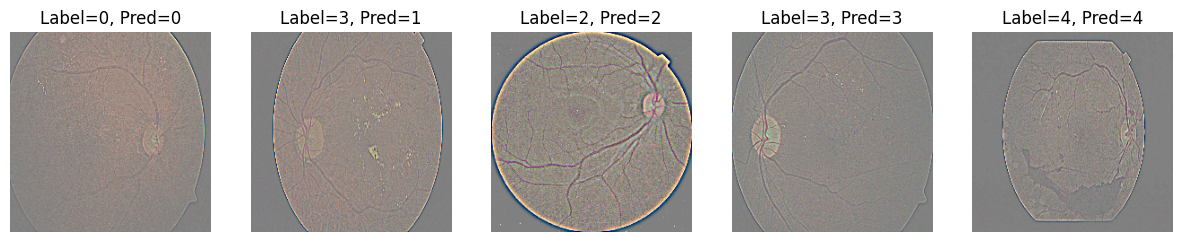

In [ ]:
plot_predicted_images(modelVGG16, train_features, train_image, train_labels)

Richiamiamo la funzione `plot_predicted_images()` per il validation set.

18/18 [==============================] - 0s 2ms/step


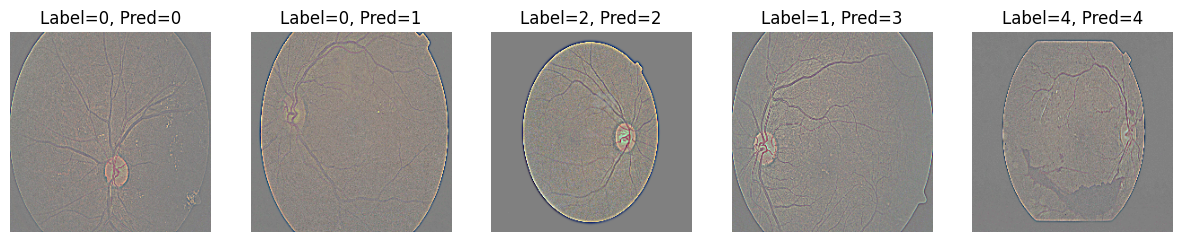

In [ ]:
plot_predicted_images(modelVGG16, val_features, val_image, val_labels)

Richiamiamo la funzione `plot_predicted_images()` per il test set.

18/18 [==============================] - 0s 2ms/step


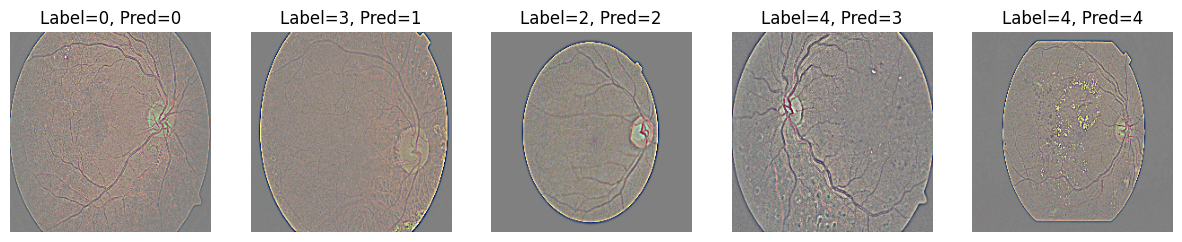

In [ ]:
plot_predicted_images(modelVGG16, test_features, test_image, test_labels)

##3 - VGG16 con Data Augmentation

###3.1 - Implementazione del modello

La data augmentation è una tecnica molto utile nel campo del deep learning, con diversi vantaggi chiave:
* Prevenzione dell'overfitting: aumenta artificialmente la dimensione del set di dati di addestramento tramite modifiche randomizzate ma realistiche di dati di addestramento esistenti (rotazioni, traslazioni, riflessioni, contrasti, ecc.). Questo processo crea variazioni che aiutano il modello a non apprendere eccessivamente i dettagli specifici del set di addestraemnto, riducendo il rischio di overfitting e migliorando la capacità del modello di generalizzare su dati nuovi.
* Altri vantaggi chiave sono: miglioramento della robustezza del modello, arricchimento del set di dati, adattibilità a compiti specifici.

In [ ]:
conv_baseVGG16 = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
conv_baseVGG16.trainable = False

Andiamo a definire la data augmentation, in particolare:
* `RandomFlip("horizontal_and_vertical")` va a capovolgere casualmente le immagini sia orizzontalmente che verticalmente.
* `RandomRotation(0.1)` ruotiamo casualmente le immagini di un angolo; in questo caso 0.1 indica il 10% dei 360 gradi possibili, quindi le immagini possono essere ruotate casualmente di più o meno 36°.
* `RandomContrast(0.1)` modifichiamo il contrasto dell'immagine in modo casuale, aumentandolo o diminuendolo del 10%.

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1)
    ])

Stampiamo un'immagine rappresentativa che ci mostri l'effetto della nostra data augmentation.

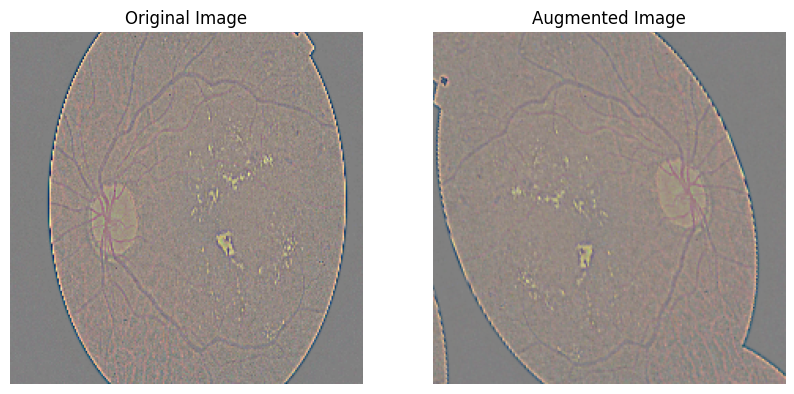

In [ ]:
image = train_image[0]  # Prendiamo la prima immagine del dataset di train

# Preparazione dell'immagine per l'augmentation
image = tf.cast(image, tf.float32) / 255.0  # Normalizzazione
image = tf.expand_dims(image, 0)  # Aggiunta di una dimensione batch

# Applicazione della data augmentation
augmented_image = data_augmentation(image)

# Visualizzazione delle immagini
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image[0])  # Mostra l'immagine originale
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(augmented_image[0])  # Mostra l'immagine con augmentation
ax[1].set_title("Augmented Image")
ax[1].axis("off")

plt.show()

Configuriamo la rete neurale applicandone la data augmentation.

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

# Applicazione dell'aumento dei dati
x = data_augmentation(inputs)
# Scaling dei valori dell'immagine
x = tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x))(x)

# Inferenza tramite la base convolutiva
x = conv_baseVGG16(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

modelVGG16 = tf.keras.Model(inputs=inputs, outputs=outputs)

Compiliamo, definiamo la callbacks e addestriamo il modello.

In [ ]:
modelVGG16.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath="feature_extraction_with_data_augmentation.keras", save_best_only=True, monitor="val_loss")]

history = modelVGG16.fit(train_dataset, epochs=20, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/20
81/81 [==============================] - 12s 127ms/step - loss: 8.9326 - accuracy: 0.6054 - val_loss: 1.2510 - val_accuracy: 0.7104
Epoch 2/20
81/81 [==============================] - 10s 127ms/step - loss: 1.5771 - accuracy: 0.6319 - val_loss: 0.9978 - val_accuracy: 0.6740
Epoch 3/20
81/81 [==============================] - 10s 127ms/step - loss: 1.2611 - accuracy: 0.6624 - val_loss: 0.9673 - val_accuracy: 0.7268
Epoch 4/20
81/81 [==============================] - 10s 127ms/step - loss: 1.1900 - accuracy: 0.6741 - val_loss: 0.8570 - val_accuracy: 0.7250
Epoch 5/20
81/81 [==============================] - 10s 127ms/step - loss: 1.0196 - accuracy: 0.6948 - val_loss: 0.8259 - val_accuracy: 0.7377
Epoch 6/20
81/81 [==============================] - 10s 126ms/step - loss: 1.1152 - accuracy: 0.6940 - val_loss: 0.8007 - val_accuracy: 0.7231
Epoch 7/20
81/81 [==============================] - 10s 120ms/step - loss: 1.1386 - accuracy: 0.7084 - val_loss: 1.1256 - val_accuracy: 0.7377

###3.2 - Valutazione del modello

Plottiamo i grafici dell'addestramento e training dopo aver fatto la data augmentation.

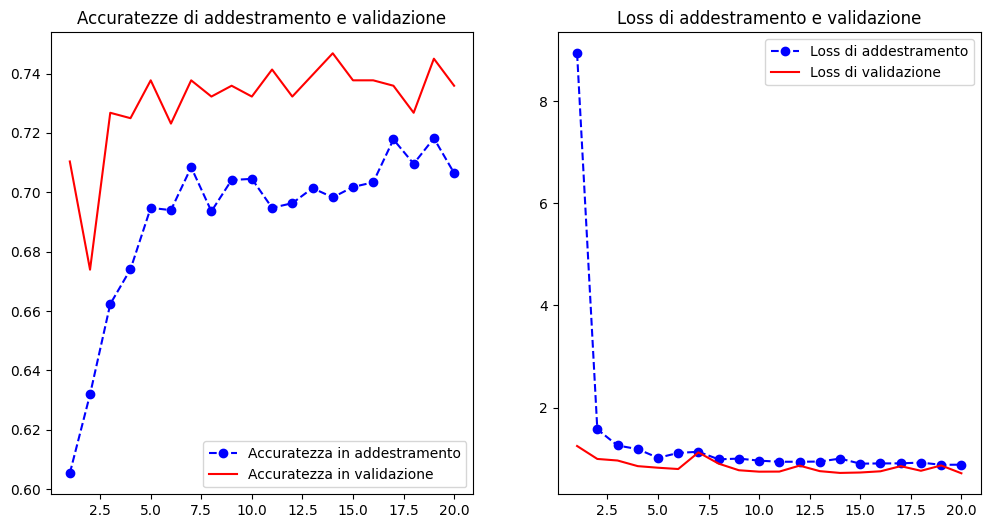

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Crea una figura con una griglia di 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # figsize controlla la dimensione totale della figura

# Grafico delle accuratezze
ax1.plot(epochs, acc, marker='o', linestyle='--', color='b', label="Accuratezza in addestramento")
ax1.plot(epochs, val_acc, "r", label="Accuratezza in validazione")
ax1.set_title("Accuratezze di addestramento e validazione")
ax1.legend()

# Grafico delle loss
ax2.plot(epochs, loss, marker='o', linestyle='--', color='b', label="Loss di addestramento")
ax2.plot(epochs, val_loss, "r", label="Loss di validazione")
ax2.set_title("Loss di addestramento e validazione")
ax2.legend()

# Mostra i grafici
plt.show()

L'accuratezza di addestramento mostra una crescita costante fino a stabilizzarsi intorno al 70%. L'accuratezza in validazione, tuttavia, mostra una varianza maggiore: questo può indicare una mancanza capacità di generalizzazione del modello su dati non visti durante l'addestramento.

La loss di addestramento diminuisce rapidamente e si stabilizza su valori molto bassi, simile la loss di validazione ma rimanendo più variabile rispetto alla loss di addestramento.

In [ ]:
test_model_augmentation = tf.keras.models.load_model("feature_extraction_with_data_augmentation.keras", safe_mode=False)
test_loss, test_acc = test_model_augmentation.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

18/18 [==============================] - 2s 91ms/step - loss: 0.7829 - accuracy: 0.7260
Test accuracy: 0.726


Richiamiamo la funzione per ottenere le etichette e le predizioni dal dataset di test e calcoliamo il TPR e FPR.

In [ ]:
# Ottenere etichette e predizioni dal test_dataset
test_y_true, test_y_pred = get_labels_and_predictions(modelVGG16, test_dataset)

# Calcolare TPR e FPR
tpr, fpr = calculate_tpr_fpr(test_y_true, test_y_pred)

print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

1/1 [==============================] - 0s 158ms/step
True Positive Rate (TPR): {0: 0.0, 1: 0.9466666666666667, 2: 0.9520295202952029, 3: 0.0, 4: 0.0}
False Positive Rate (FPR): {0: 0.006060606060606061, 1: 0.34413965087281795, 2: 0.03571428571428571, 3: 0.0, 4: 0.0}


Stampiamo la matrice di confusione per tutte le classi.

Matrice di confusione:
 [[  0  51   5   0   0]
 [  3 142   5   0   0]
 [  0  13 258   0   0]
 [  0  45   0   0   0]
 [  0  29   0   0   0]]


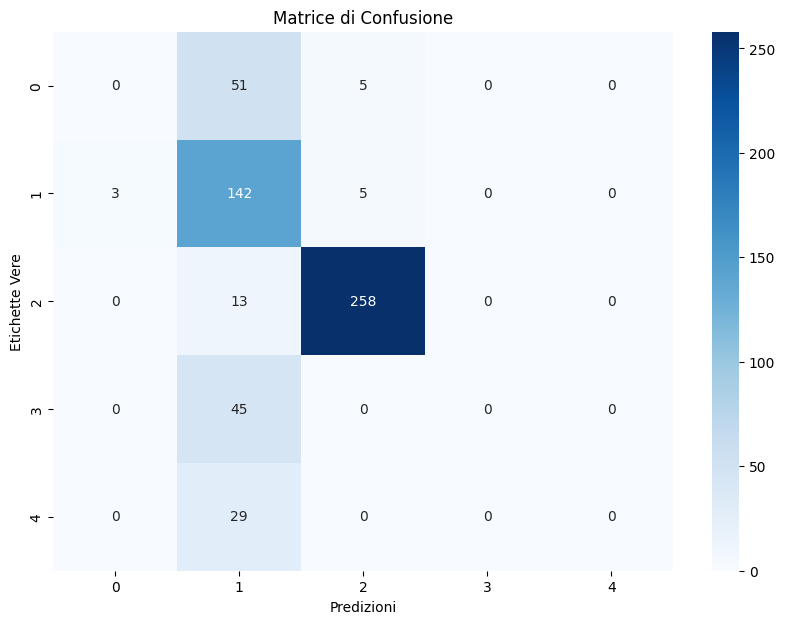

In [ ]:
# Calcolare la matrice di confusione
cm = confusion_matrix(test_y_true, test_y_pred)
print("Matrice di confusione:\n", cm)

# Visualizzazione della matrice di confusione con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Predizioni')
plt.ylabel('Etichette Vere')
plt.show()

Otteniamo le etichette e le predizioni binarizzate.

In [ ]:
# Ottieni le etichette e le predizioni binarizzate
test_y_true_bin, test_y_pred_bin = binarize_labels(test_y_pred, test_y_true)

Calcoliamo il TPR e FPR per le classi binarizzate.

In [ ]:
tpr_bin, fpr_bin = calculate_tpr_fpr_binary(test_y_true_bin, test_y_pred_bin)
print("Binarized TPR:", tpr_bin)
print("Binarized FPR:", fpr_bin)

Binarized TPR: 0.9939393939393939
Binarized FPR: 1.0


Calcoliamo e plottiamo la matrice di confusione binarizzata.

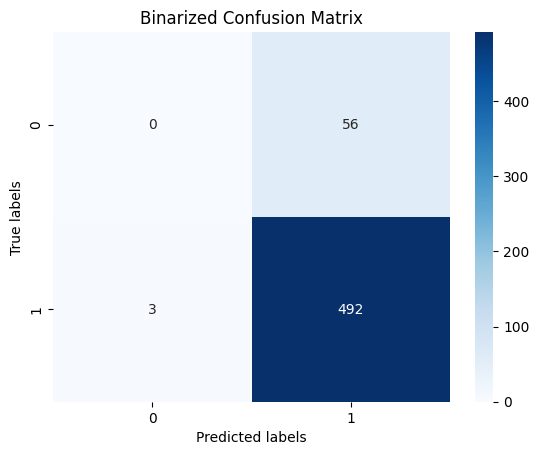

In [ ]:
# Calcolo e visualizzazione della matrice di confusione binarizzata
cm_bin = confusion_matrix(test_y_true_bin, test_y_pred_bin)
sns.heatmap(cm_bin, annot=True, fmt="d", cmap='Blues')
plt.title('Binarized Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

La data augmentation non sembra aver migliorato significativamente la capacità del modello di generalizzare, come indicato dalla discrepanza tra accuratezza di addestramento e di validazione.
Le cause potrebbero essere molteplici, tra cui:
* Il tipo di data augmentation potrebbe non essere completamente adatti al tipo di dati o al problema dell'analisi della retinopatia diabetica.
* I parametri del modello potrebbero non essere ottimali, inclusi i parametri di regolarizzazione e i dettagli dell'architettura.

##4 - VGG16 Fine-tuning

###4.1 - Implementazione del modello

Un'altra strategia efficace per adattare un modello preesistente a un nuovo compito è il "fine-tuning". Questo metodo comporta il parziale scongelamento dei livelli superiori di una rete convolutiva pre-addestrata, come la VGG16 originariamente allenata su ImageNet, mantenendo esclusi i livelli di classificazione finale. Durante il fine-tuning, sia i livelli appena scongelati sia i componenti aggiuntivi del modello, tipicamente i livelli densamente connessi per la classificazione, vengono addestrati insieme. Questo approccio permette di affinare le rappresentazioni più complesse e astratte acquisite dal modello, rendendole più pertinenti per specifiche applicazioni o set di dati. In sostanza, il fine-tuning modifica delicatamente le parti più avanzate della rete per ottimizzare le prestazioni su compiti nuovi o leggermente diversi da quelli originari.

In [ ]:
conv_baseVGG16 = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False)

In [ ]:
conv_baseVGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Congeliamo l'addestramento di tutti i livelli della rete convolutiva pre-addestrata base, esclusi gli ultimi dieci.

In [ ]:
conv_baseVGG16.trainable = True
for layer in conv_baseVGG16.layers[:-10]:
 layer.trainable = False

Combiniamo anche con la data augmentation fatta precedentemente, andiamo a costruire il nostro modello basato sulla rete convolutiva parzialmente congelata.

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

# Applicazione dell'aumento dei dati
x = data_augmentation(inputs)
# Scaling dei valori
x = tf.keras.layers.Lambda(lambda x: tf.keras.applications.vgg16.preprocess_input(x))(x)

# Inferenza tramite la base convoluzionale
x = conv_baseVGG16(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

modelVGG16 = tf.keras.Model(inputs, outputs)

Compiliamo, definiamo la callbacks e addestriamo il modello "parzialmente congelato".

In [ ]:
modelVGG16.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-6), metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath="fine_tuning.keras", save_best_only=True, monitor="val_loss")]

history_fine_tuning = modelVGG16.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
81/81 [==============================] - 15s 159ms/step - loss: 1.1987 - accuracy: 0.5195 - val_loss: 0.8932 - val_accuracy: 0.7086
Epoch 2/30
81/81 [==============================] - 13s 156ms/step - loss: 0.9863 - accuracy: 0.6241 - val_loss: 0.8343 - val_accuracy: 0.7177
Epoch 3/30
81/81 [==============================] - 13s 154ms/step - loss: 0.9134 - accuracy: 0.6671 - val_loss: 0.7906 - val_accuracy: 0.7286
Epoch 4/30
81/81 [==============================] - 12s 153ms/step - loss: 0.8914 - accuracy: 0.6768 - val_loss: 0.7715 - val_accuracy: 0.7231
Epoch 5/30
81/81 [==============================] - 12s 153ms/step - loss: 0.8395 - accuracy: 0.6948 - val_loss: 0.7531 - val_accuracy: 0.7268
Epoch 6/30
81/81 [==============================] - 12s 153ms/step - loss: 0.8283 - accuracy: 0.7065 - val_loss: 0.7310 - val_accuracy: 0.7304
Epoch 7/30
81/81 [==============================] - 12s 153ms/step - loss: 0.8092 - accuracy: 0.7077 - val_loss: 0.7169 - val_accuracy: 0.7268

###4.2 - Valutazione del modello

Plottiamo accuracy e loss di traning e validazione del modello con fine-tuning.

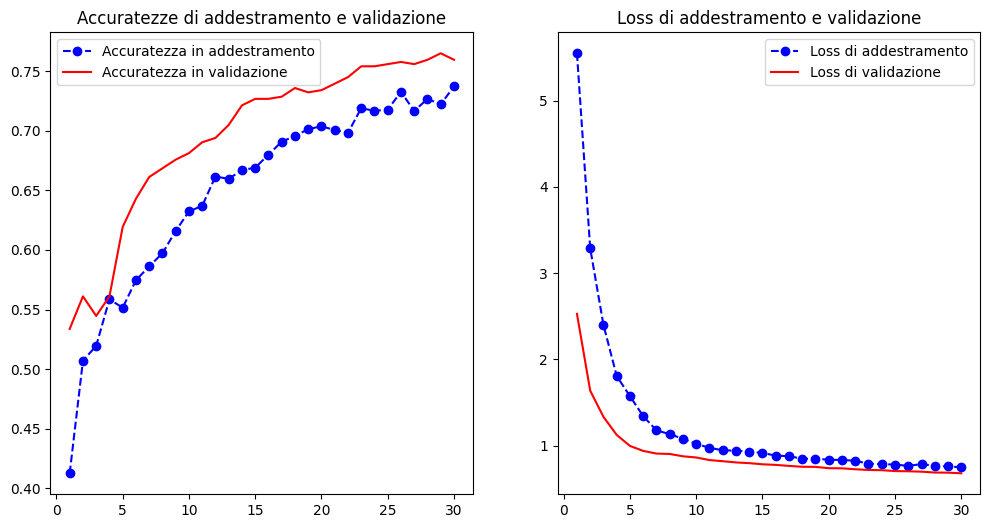

In [ ]:
acc = history_fine_tuning.history["accuracy"]
val_acc = history_fine_tuning.history["val_accuracy"]
loss = history_fine_tuning.history["loss"]
val_loss = history_fine_tuning.history["val_loss"]
epochs = range(1, len(acc) + 1)

# Crea una figura con una griglia di 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # figsize controlla la dimensione totale della figura

# Grafico delle accuratezze
ax1.plot(epochs, acc, marker='o', linestyle='--', color='b', label="Accuratezza in addestramento")
ax1.plot(epochs, val_acc, "r", label="Accuratezza in validazione")
ax1.set_title("Accuratezze di addestramento e validazione")
ax1.legend()

# Grafico delle loss
ax2.plot(epochs, loss, marker='o', linestyle='--', color='b', label="Loss di addestramento")
ax2.plot(epochs, val_loss, "r", label="Loss di validazione")
ax2.set_title("Loss di addestramento e validazione")
ax2.legend()

# Mostra i grafici
plt.show()

Siamo arrivati ad una accuracy del 75% circa.

Entrambi i grafici mostrano segni positivi di buona generalizzazione. L'accuratezza in addestramento mostra un trend generalmente crescente, il che è positivo poiché indica che il modello migliora la sua capacità di prevedere correttamente i dati su cui si allena. L'accuratezza in validazione segue una traiettoria simile a quella dell'addestramento e aumenta progressivamente. Tuttavia, mostra una maggiore volatilità.

La loss di addestramento diminuisce costantemente, indicando che il modello sta imparando efficacemente dai dati di addestramento.



Effettuiamo una prova sul modello con i dati di test.

In [ ]:
model_test_finetuning = tf.keras.models.load_model("fine_tuning.keras", safe_mode=False)
test_loss, test_acc = model_test_finetuning.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

18/18 [==============================] - 2s 91ms/step - loss: 0.6761 - accuracy: 0.7750
Test accuracy: 0.775


Otteniamo le etichette e le predizioni dal dataset di test e calcoliamo TPR e FPR.

In [ ]:
# Ottenere etichette e predizioni dal test_dataset
test_y_true, test_y_pred = get_labels_and_predictions(modelVGG16, test_dataset)

# Calcolare TPR e FPR
tpr, fpr = calculate_tpr_fpr(test_y_true, test_y_pred)

print("True Positive Rate (TPR):", tpr)
print("False Positive Rate (FPR):", fpr)

1/1 [==============================] - 0s 161ms/step
True Positive Rate (TPR): {0: 0.5, 1: 0.88, 2: 0.985239852398524, 3: 0.0, 4: 0.0}
False Positive Rate (FPR): {0: 0.04040404040404041, 1: 0.2119700748129676, 2: 0.06785714285714285, 3: 0.0, 4: 0.0}


Calcoliamo la matrice di confusione per tutte le classi.

Matrice di confusione:
 [[ 28  22   6   0   0]
 [  8 132  10   0   0]
 [  2   2 267   0   0]
 [  9  34   2   0   0]
 [  1  27   1   0   0]]


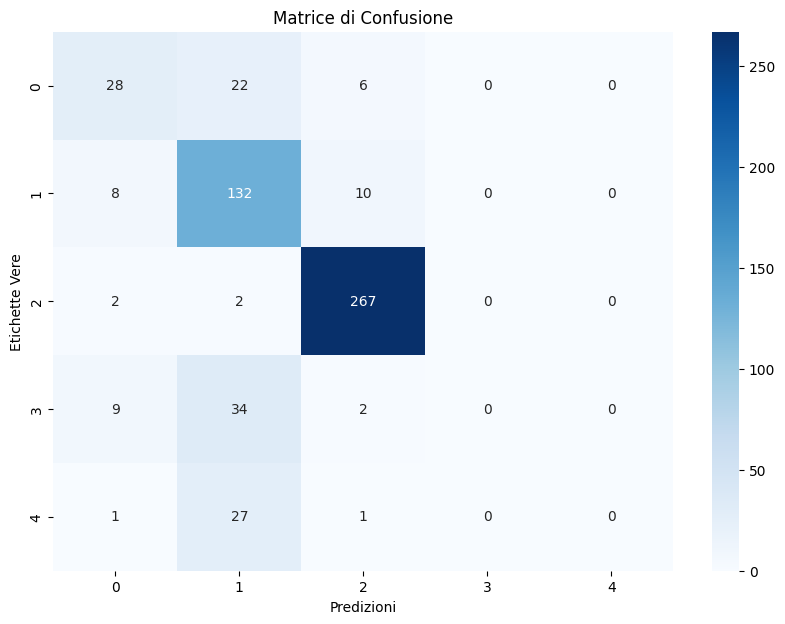

In [ ]:
# Calcolare la matrice di confusione
cm = confusion_matrix(test_y_true, test_y_pred)
print("Matrice di confusione:\n", cm)

# Visualizzazione della matrice di confusione con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Predizioni')
plt.ylabel('Etichette Vere')
plt.show()

Otteniamo le etichette e le predizioni binarizzate.

In [ ]:
test_y_true_bin, test_y_pred_bin = binarize_labels(test_y_pred, test_y_true)

Calcoliamo il TPR e FPR per le classi binarizzate.

In [ ]:
tpr_bin, fpr_bin = calculate_tpr_fpr_binary(test_y_true_bin, test_y_pred_bin)
print("Binarized TPR:", tpr_bin)
print("Binarized FPR:", fpr_bin)

Binarized TPR: 0.9595959595959596
Binarized FPR: 0.5


Calcoliamo e visualizzaziamo la matrice di confusione per i valori binarizzati.

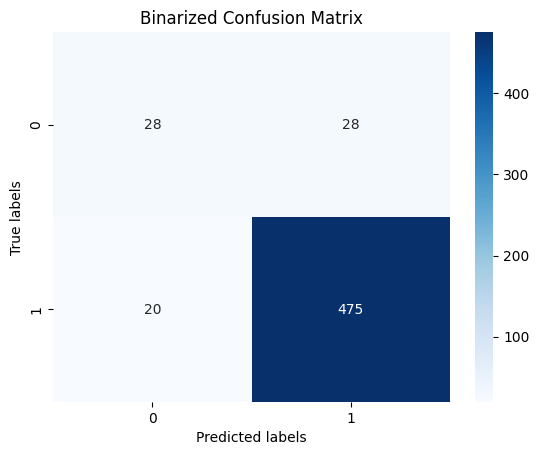

In [ ]:
# Calcolo e visualizzazione della matrice di confusione binarizzata
cm_bin = confusion_matrix(test_y_true_bin, test_y_pred_bin)
sns.heatmap(cm_bin, annot=True, fmt="d", cmap='Blues')
plt.title('Binarized Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##5 - Conclusioni

Possiamo notare come, il VGG16 "base" indichi potenzialmente un overfitting del modello.

L'uso della data augmentation ha migliorato leggermente la generalizzazione del modello, poiché l'accuratezza di validazione è più vicina a quella di addestramento e la variazione è meno evidente rispetto alla versione "base". Questo potrebbe indicare una riduzione dell'overfitting, permettendo di generalizzare meglio su dati non visti durante l'addestramento.

Abbiamo ulteriori miglioramenti con l'introduzione del fine-tuning oltre alla data augmentation: l'accuratezza di validazione non solo segue più strettamente quella di addestramento, ma si nota anche un significativo incremento nelle performance di validazione rispetto ai precedenti modelli. Questo suggerisce che il fine-tuning ha permesso al modello di adattarsi meglio alle caratteristiche del dataset.

Ho deciso di utilizzare il TPR (True Positive Rate) e il FPR (FPR) perché sono due metriche comunemente utilizzate nella valutazione dei modelli di classificazione, sopratutto in contesti come la diagnosi medica o il rilevamento di anomalie:
* Il TPR è una misura di quanto bene un modello è in grado di identificare correttamente i casi positivi tra tutti i casi effettivamente positivi.
* Il FPR è una misura di quanto spesso il modello sbaglia identificando come positivi dei casi che sono in realtà negativi.

Quando siamo andati a svolgere la binarizzazione dei dati, il VGG16 con data augmentation sembra sia risultato migliore.
In questo contesto, analisi della retinopatia diabetica, come qualunque task medico, è importante che il modello non segni negative persone che sono effettivamente malate. Questo perché, trattando un argomento così sensibile è preferibile che una persona venga definita "malata" per proseguire poi con altri controlli.

Penso che ora come ora, il modello non sia abbastanza sviluppato per una pensabile implementazione nell'aiutare il medico nella decisione della diagnosi.

Gli sviluppi futuri che eseguirei sono diversi, tra cui:
* Implementazione di una tecnica di XAI per capire come ragiona il modello;
* Raccolta di più dati per aiutare la generalizzazione del modello;
* Applicare altre tecniche di data augmentation;
* Aumentare il numero di epoche di ogni addestramento;
* Implementare altri modelli per capire se rispondono meglio a questo task.